[출처](https://www.youtube.com/watch?v=lG8pEwvYwCw&list=PL7ZVZgsnLwEEZcVusN-fV_sJhQHq833OS&index=2)

In [3]:
import pandas as pd
import numpy as np

## 데이터 집계와 그룹 연산

#### 집계 연산(Aggregation)


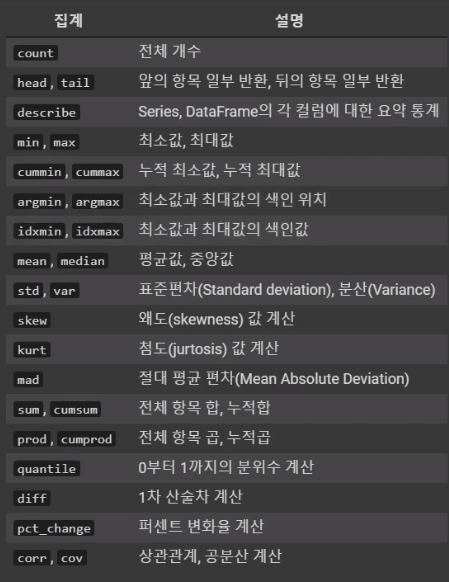

In [4]:
df = pd.DataFrame( [[1, 1.2, np.nan],
                    [2.4, 5.5, 4.2],
                    [np.nan, np.nan, np.nan],
                    [0.44, -3.1, -4.1]],
                    index=[1, 2, 3, 4],
                    columns=['A', 'B', 'C'])
df

,A,B,C
1,1.00,1.2,NaN
2,2.40,5.5,4.2
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [5]:
df.head(2)

,A,B,C
1,1.0,1.2,NaN
2,2.4,5.5,4.2


In [6]:
df.tail(2)

,A,B,C
3,NaN,NaN,NaN
4,0.44,-3.1,-4.1


In [7]:
df.describe()

,A,B,C
count,3.000000,3.00,2.000000
mean,1.280000,1.20,0.050000
std,1.009554,4.30,5.868986
min,0.440000,-3.10,-4.100000
25%,0.720000,-0.95,-2.025000
50%,1.000000,1.20,0.050000
75%,1.700000,3.35,2.125000
max,2.400000,5.50,4.200000


In [10]:
print(df)
print(np.argmin(df), np.argmax(df))

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
2 2


In [11]:
print(df)
print(df.idxmin())
print(df.idxmax())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    4
B    4
C    4
dtype: int64
A    2
B    2
C    2
dtype: int64


In [13]:
print(df)
print(df.std())
print(df.var())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.009554
B    4.300000
C    5.868986
dtype: float64
A     1.0192
B    18.4900
C    34.4450
dtype: float64


In [14]:
print(df)
print(df.skew())
print(df.kurt())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    1.15207
B    0.00000
C        NaN
dtype: float64
A   NaN
B   NaN
C   NaN
dtype: float64


In [15]:
print(df)
print(df.sum())
print(df.cumsum())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A    3.84
B    3.60
C    0.10
dtype: float64
      A    B    C
1  1.00  1.2  NaN
2  3.40  6.7  4.2
3   NaN  NaN  NaN
4  3.84  3.6  0.1


In [16]:
print(df)
print(df.prod())
print(df.cumprod())

      A    B    C
1  1.00  1.2  NaN
2  2.40  5.5  4.2
3   NaN  NaN  NaN
4  0.44 -3.1 -4.1
A     1.056
B   -20.460
C   -17.220
dtype: float64
       A      B      C
1  1.000   1.20    NaN
2  2.400   6.60   4.20
3    NaN    NaN    NaN
4  1.056 -20.46 -17.22


In [17]:
df.diff()

,A,B,C
1,NaN,NaN,NaN
2,1.4,4.3,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [18]:
df.quantile()

A    1.00
B    1.20
C    0.05
Name: 0.5, dtype: float64

In [19]:
df.pct_change()

,A,B,C
1,NaN,NaN,NaN
2,1.400000,3.583333,NaN
3,0.000000,0.000000,0.00000
4,-0.816667,-1.563636,-1.97619


In [20]:
df.corr()

,A,B,C
A,1.000000,0.970725,1.0
B,0.970725,1.000000,1.0
C,1.000000,1.000000,1.0


In [21]:
df.corrwith(df.B)

A    0.970725
B    1.000000
C    1.000000
dtype: float64

In [22]:
df.cov()

,A,B,C
A,1.0192,4.214,8.134
B,4.2140,18.490,35.690
C,8.1340,35.690,34.445


In [23]:
df['B'].unique()

array([ 1.2,  5.5,  nan, -3.1])

In [25]:
df['A'].value_counts()

0.44    1
2.40    1
1.00    1
Name: A, dtype: int64

### GroupBy 연산

In [45]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'b', 'c', 'd', 'b'],
                   'c2':['A', 'B', 'B', 'A', 'D', 'C', 'C'],
                   'c3':np.random.randint(7),
                   'c4':np.random.random(7)})
df    

,c1,c2,c3,c4
0,a,A,3,0.544756
1,a,B,3,0.268335
2,b,B,3,0.715770
3,b,A,3,0.616118
4,c,D,3,0.424570
5,d,C,3,0.981264
6,b,C,3,0.845592


In [46]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [47]:
df['c3'].groupby(df['c1']) # groupby는 객체일뿐

In [48]:
df['c3'].groupby(df['c1']).mean()

c1
a    3
b    3
c    3
d    3
Name: c3, dtype: int64

In [49]:
df['c4'].groupby(df['c2']).std()

c2
A    0.050461
B    0.316384
C    0.095935
D         NaN
Name: c4, dtype: float64

In [51]:
df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.544756
    B     0.268335
b   A     0.616118
    B     0.715770
    C     0.845592
c   D     0.424570
d   C     0.981264
Name: c4, dtype: float64

In [53]:
df['c4'].groupby([df['c1'], df['c2']]).mean().unstack()

c2,A,B,C,D
c1,,,,
a,0.544756,0.268335,NaN,NaN
b,0.616118,0.715770,0.845592,NaN
c,NaN,NaN,NaN,0.42457
d,NaN,NaN,0.981264,NaN


In [54]:
df.groupby('c1').mean()

,c3,c4
c1,,
a,3,0.406545
b,3,0.725827
c,3,0.424570
d,3,0.981264


In [55]:
df.groupby(['c1', 'c2']).mean()

c3        c4
c1 c2              
a  A    3  0.544756
   B    3  0.268335
b  A    3  0.616118
   B    3  0.715770
   C    3  0.845592
c  D    3  0.424570
d  C    3  0.981264

In [56]:
df.groupby(['c1', 'c2']).size()

c1  c2
a   A     1
    B     1
b   A     1
    B     1
    C     1
c   D     1
d   C     1
dtype: int64

In [57]:
for c1, group in df.groupby('c1'):
    print(c1)
    print(group)

a
  c1 c2  c3        c4
0  a  A   3  0.544756
1  a  B   3  0.268335
b
  c1 c2  c3        c4
2  b  B   3  0.715770
3  b  A   3  0.616118
6  b  C   3  0.845592
c
  c1 c2  c3       c4
4  c  D   3  0.42457
d
  c1 c2  c3        c4
5  d  C   3  0.981264


In [58]:
for (c1, c2), group in df.groupby(['c1','c2']):
    print((c1, c2))
    print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   3  0.544756
('a', 'B')
  c1 c2  c3        c4
1  a  B   3  0.268335
('b', 'A')
  c1 c2  c3        c4
3  b  A   3  0.616118
('b', 'B')
  c1 c2  c3       c4
2  b  B   3  0.71577
('b', 'C')
  c1 c2  c3        c4
6  b  C   3  0.845592
('c', 'D')
  c1 c2  c3       c4
4  c  D   3  0.42457
('d', 'C')
  c1 c2  c3        c4
5  d  C   3  0.981264


In [60]:
df.groupby(['c1', 'c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.544756
   B   0.268335
b  A   0.616118
   B   0.715770
   C   0.845592
c  D   0.424570
d  C   0.981264

In [62]:
df.groupby('c1')['c3'].quantile()

c1
a    3.0
b    3.0
c    3.0
d    3.0
Name: c3, dtype: float64

In [63]:
df.groupby('c1')['c3'].count()

c1
a    2
b    3
c    1
d    1
Name: c3, dtype: int64

In [64]:
df.groupby('c1')['c4'].median()

c1
a    0.406545
b    0.715770
c    0.424570
d    0.981264
Name: c4, dtype: float64

In [65]:
df.groupby('c1')['c4'].std()

c1
a    0.195459
b    0.115067
c         NaN
d         NaN
Name: c4, dtype: float64

In [66]:
df.groupby(['c1', 'c2'])['c4'].agg(['mean', 'min', 'max'])

mean       min       max
c1 c2                              
a  A   0.544756  0.544756  0.544756
   B   0.268335  0.268335  0.268335
b  A   0.616118  0.616118  0.616118
   B   0.715770  0.715770  0.715770
   C   0.845592  0.845592  0.845592
c  D   0.424570  0.424570  0.424570
d  C   0.981264  0.981264  0.981264

In [67]:
df.groupby(['c1','c2'], as_index=False)['c4'].mean() # as_index 펄스는 그룹 인덱스를 하지 않는다. 

,c1,c2,c4
0,a,A,0.544756
1,a,B,0.268335
2,b,A,0.616118
3,b,B,0.715770
4,b,C,0.845592
5,c,D,0.424570
6,d,C,0.981264


In [68]:
df.groupby(['c1','c2'], group_keys=False)['c4'].mean() 

c1  c2
a   A     0.544756
    B     0.268335
b   A     0.616118
    B     0.715770
    C     0.845592
c   D     0.424570
d   C     0.981264
Name: c4, dtype: float64

In [69]:
def top(df, n=3, column='c1'):
    return df.sort_values(by=column)[-n:]

top(df, n=5)

,c1,c2,c3,c4
2,b,B,3,0.715770
3,b,A,3,0.616118
6,b,C,3,0.845592
4,c,D,3,0.424570
5,d,C,3,0.981264


In [71]:
print(df)
df.groupby('c1').apply(top)

  c1 c2  c3        c4
0  a  A   3  0.544756
1  a  B   3  0.268335
2  b  B   3  0.715770
3  b  A   3  0.616118
4  c  D   3  0.424570
5  d  C   3  0.981264
6  b  C   3  0.845592


c1 c2  c3        c4
c1                      
a  0  a  A   3  0.544756
   1  a  B   3  0.268335
b  2  b  B   3  0.715770
   3  b  A   3  0.616118
   6  b  C   3  0.845592
c  4  c  D   3  0.424570
d  5  d  C   3  0.981264

### 피벗 테이블(Pivot Table)


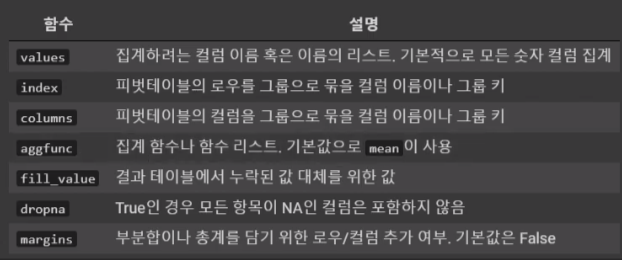

In [73]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'])

c3                       c4                             
c2    A    B    C    D         A         B         C        D
c1                                                           
a   3.0  3.0  NaN  NaN  0.544756  0.268335       NaN      NaN
b   3.0  3.0  3.0  NaN  0.616118  0.715770  0.845592      NaN
c   NaN  NaN  NaN  3.0       NaN       NaN       NaN  0.42457
d   NaN  NaN  3.0  NaN       NaN       NaN  0.981264      NaN

In [75]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True) # margins : 부분함 총계

c3                           c4                                       
c2     A    B    C    D All         A         B         C        D       All
c1                                                                          
a    3.0  3.0  NaN  NaN   3  0.544756  0.268335       NaN      NaN  0.406545
b    3.0  3.0  3.0  NaN   3  0.616118  0.715770  0.845592      NaN  0.725827
c    NaN  NaN  NaN  3.0   3       NaN       NaN       NaN  0.42457  0.424570
d    NaN  NaN  3.0  NaN   3       NaN       NaN  0.981264      NaN  0.981264
All  3.0  3.0  3.0  3.0   3  0.580437  0.492052  0.913428  0.42457  0.628058

In [76]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum)

c3                           c4                                       
c2     A    B    C    D All         A         B         C        D       All
c1                                                                          
a    3.0  3.0  NaN  NaN   6  0.544756  0.268335       NaN      NaN  0.813091
b    3.0  3.0  3.0  NaN   9  0.616118  0.715770  0.845592      NaN  2.177480
c    NaN  NaN  NaN  3.0   3       NaN       NaN       NaN  0.42457  0.424570
d    NaN  NaN  3.0  NaN   3       NaN       NaN  0.981264      NaN  0.981264
All  6.0  6.0  6.0  3.0  21  1.160874  0.984105  1.826857  0.42457  4.396405

In [77]:
df.pivot_table(['c3', 'c4'],
               index=['c1'],
               columns=['c2'],
               margins=True,
               aggfunc=sum,
               fill_value=0 )

c3                     c4                                       
c2   A  B  C  D All         A         B         C        D       All
c1                                                                  
a    3  3  0  0   6  0.544756  0.268335  0.000000  0.00000  0.813091
b    3  3  3  0   9  0.616118  0.715770  0.845592  0.00000  2.177480
c    0  0  0  3   3  0.000000  0.000000  0.000000  0.42457  0.424570
d    0  0  3  0   3  0.000000  0.000000  0.981264  0.00000  0.981264
All  6  6  6  3  21  1.160874  0.984105  1.826857  0.42457  4.396405

In [78]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


In [79]:
pd.crosstab(df.c1, df.c2, values=df.c3, aggfunc=sum, margins=True)

c2,A,B,C,D,All
c1,,,,,
a,3.0,3.0,NaN,NaN,6
b,3.0,3.0,3.0,NaN,9
c,NaN,NaN,NaN,3.0,3
d,NaN,NaN,3.0,NaN,3
All,6.0,6.0,6.0,3.0,21


### 범주형(Categorical) 데이터


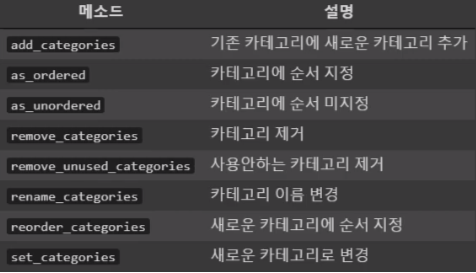

In [81]:
s = pd.Series(['c1', 'c2', 'c1', 'c2', 'c2'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c2
5    c1
6    c2
7    c1
8    c2
9    c2
dtype: object

In [82]:
pd.unique(s)

array(['c1', 'c2'], dtype=object)

In [83]:
pd.value_counts(s)

c2    6
c1    4
dtype: int64

In [84]:
code = pd.Series([0, 1, 0, 1, 0] * 2)
code

0    0
1    1
2    0
3    1
4    0
5    0
6    1
7    0
8    1
9    0
dtype: int64

In [85]:
d = pd.Series(['c1', 'c2'])
d

0    c1
1    c2
dtype: object

In [86]:
d.take(code)

0    c1
1    c2
0    c1
1    c2
0    c1
0    c1
1    c2
0    c1
1    c2
0    c1
dtype: object

In [89]:
df = pd.DataFrame({ 'id' : np.arange(len(s)),
                    'c' : s, 
                    'v' : np.random.randint(1000, 5000, size=len(s))})
df

,id,c,v
0,0,c1,2726
1,1,c2,2980
2,2,c1,3194
3,3,c2,2603
4,4,c2,1187
5,5,c1,2307
6,6,c2,1798
7,7,c1,4371
8,8,c2,1306
9,9,c2,2531


In [91]:
c = df['c'].astype('category')
c 

0    c1
1    c2
2    c1
3    c2
4    c2
5    c1
6    c2
7    c1
8    c2
9    c2
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [92]:
c.values

['c1', 'c2', 'c1', 'c2', 'c2', 'c1', 'c2', 'c1', 'c2', 'c2']
Categories (2, object): ['c1', 'c2']

In [93]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [94]:
c.values.codes

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int8)

In [95]:
df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c2
5    c1
6    c2
7    c1
8    c2
9    c2
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [96]:
c = pd.Categorical(['c1', 'c2', 'c3', 'c1', 'c2'])
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [97]:
categories = ['c1', 'c2', 'c3']
codes = [0, 1, 2, 0, 1]
c = pd.Categorical.from_codes(codes, categories)
c

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1', 'c2', 'c3']

In [98]:
pd.Categorical.from_codes(codes, categories, ordered=True)

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [99]:
c.as_ordered()

['c1', 'c2', 'c3', 'c1', 'c2']
Categories (3, object): ['c1' < 'c2' < 'c3']

In [100]:
c.codes

array([0, 1, 2, 0, 1], dtype=int8)

In [101]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

In [102]:
c = c.set_categories(['c1', 'c2', 'c3', 'c4', 'c5'])
c.categories

Index(['c1', 'c2', 'c3', 'c4', 'c5'], dtype='object')

In [103]:
c.value_counts()

c1    2
c2    2
c3    1
c4    0
c5    0
dtype: int64

In [105]:
c[c.isin(['c1','c3','c4'])]

['c1', 'c3', 'c1']
Categories (5, object): ['c1', 'c2', 'c3', 'c4', 'c5']

In [108]:
c = c.remove_unused_categories() # 사용하지 않은 항목 제거

In [109]:
c.categories

Index(['c1', 'c2', 'c3'], dtype='object')

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly